# BREAST CANCER PREDICTION ICA PROJECT

In [1]:
#Importation of Required Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report



#This importation is to ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
#Importation and Loading of Datasets
df = pd.read_csv('breast_cancer_updated.csv', index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
1,M,0.425053,5.965067,1.878999,-1.922577,-8.191107,-9.662919,-0.619291,-1.315248,-4.107378,...,0.615896,2.002757,-0.201908,0.120528,0.035929,-0.582654,10.078263,3.396570,-0.474207,0.938795
2,B,-0.720491,1.122032,0.702666,0.588757,-2.897603,6.737809,0.293614,-2.898675,2.812344,...,-1.545681,0.131865,-1.040233,-0.323723,1.218420,0.165080,0.415971,-2.714283,2.652932,-0.403200
3,B,1.624526,0.466168,1.600550,2.200664,4.272945,2.390065,0.614031,-0.314448,1.867168,...,-0.118669,-1.379621,-1.324658,-0.282837,5.802867,-0.325060,-4.156908,1.968221,-0.054791,0.076663
4,M,-1.124956,-2.165492,-0.215090,-1.795210,-6.011122,-7.283305,0.147977,-1.520045,-4.330120,...,1.001215,0.350980,-0.173384,1.782559,-2.723687,-6.602257,-8.789461,5.394188,0.201087,-0.310054
5,B,-0.349488,-1.915211,-2.885086,-0.182034,1.586092,1.645780,-0.532385,-1.009785,-1.919263,...,-0.538012,1.444644,0.758448,-0.303827,4.672285,-5.195357,-3.044978,1.988163,-0.465882,-0.207049


# STATISTICAL ANALYSIS

In [3]:
#Shape of the Datsaset Showing the Number of Rows and Columns
df.shape

(5015, 31)

In [4]:
#details of the last 5 rows of the dataset  
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
5011,B,-0.740945,0.299536,0.525151,-1.026108,-2.498535,1.684233,-0.431974,0.458064,1.040516,...,0.126595,-0.980428,-0.100143,-0.649952,1.861477,-1.636387,-3.998390,-0.713670,0.657338,-0.688494
5012,B,0.630046,-1.431621,-3.541158,1.360829,3.827369,3.195824,1.988697,-0.038839,-0.289488,...,-0.784634,-0.626414,-1.257574,-0.148175,3.097885,-3.837613,-0.106725,1.786798,-0.500343,-2.279473
5013,B,0.946636,-2.902138,-3.119418,2.742162,7.000024,6.878013,-0.436317,0.923706,1.317446,...,1.443981,0.179008,0.097126,0.144724,2.396319,-1.281459,0.898836,2.499513,-2.107364,-0.524659
5014,M,0.239837,-2.315114,-1.400947,-1.327012,-1.024908,-0.790157,1.517334,0.320616,-1.282254,...,0.056867,-2.065378,0.995654,-0.769114,3.992847,-4.710323,-7.638259,2.096088,1.535131,1.255678
5015,M,-0.410249,0.589452,1.365417,0.711706,0.321714,-7.001669,-1.901880,-0.789668,-0.321557,...,-2.437734,0.208962,0.413331,-0.827885,-2.620811,-2.820564,-0.537160,2.524056,0.775031,0.459024


In [5]:
#Checking for Duplicate values
df.duplicated().sum()

0

In [6]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
#Summary of the Dataset Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5015 entries, 1 to 5015
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                5015 non-null   object 
 1   radius_mean              5015 non-null   float64
 2   texture_mean             5015 non-null   float64
 3   perimeter_mean           5015 non-null   float64
 4   area_mean                5015 non-null   float64
 5   smoothness_mean          5015 non-null   float64
 6   compactness_mean         5015 non-null   float64
 7   concavity_mean           5015 non-null   float64
 8   concave points_mean      5015 non-null   float64
 9   symmetry_mean            5015 non-null   float64
 10  fractal_dimension_mean   5015 non-null   float64
 11  radius_se                5015 non-null   float64
 12  texture_se               5015 non-null   float64
 13  perimeter_se             5015 non-null   float64
 14  area_se                  5015

In [8]:
#Description of the Dataset showing the Mean, Median, Mode, Standard Deviation, Minimum and Maximum Values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,5015.0,-0.000891,0.983444,-3.464809,-0.660010,0.013061,0.665335,3.760155
texture_mean,5015.0,-0.554704,2.232376,-7.436473,-2.190959,-0.483064,1.099535,6.006848
perimeter_mean,5015.0,-0.554793,2.279260,-10.236226,-2.228786,-0.575160,1.034569,6.054870
area_mean,5015.0,-0.936175,2.136099,-6.633334,-2.418635,-1.068058,0.392419,7.201103
smoothness_mean,5015.0,-1.391810,4.579244,-16.006729,-4.516750,-1.825548,1.401192,14.436964
compactness_mean,5015.0,-0.461217,5.125060,-14.309880,-4.402932,-1.052080,3.593830,15.157340
concavity_mean,5015.0,0.020568,0.993755,-3.153111,-0.653703,0.026035,0.678656,3.766180
concave points_mean,5015.0,-0.014652,1.001308,-3.940008,-0.691080,-0.007397,0.650388,3.712795
symmetry_mean,5015.0,-0.382991,2.421989,-7.928758,-2.089479,-0.511122,1.295651,9.168892
fractal_dimension_mean,5015.0,0.000486,2.331952,-6.613662,-1.654903,-0.189175,1.608768,9.499183


In [9]:
#Counting the numbers of Benign and Malignant Diagnosis
#Benign Means the Tumor is not Cancerous
#Malignant Means the Tumor is Cancerous
df['diagnosis'].value_counts()

diagnosis
M    3149
B    1866
Name: count, dtype: int64

# DATA PREPROCESSING

In [10]:
#Checking for Missing Values in the Dataset using Columns
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
#Checking for Missing Values in all the Dataset
df.isnull().sum().sum()

#We have no missing values in the Dataset

0

In [12]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

In [13]:
#Checking the number of categorical columns in the dataset
#We have only one categorical column in the dataset which is the diagnosis column
cat = df.select_dtypes(include='object').columns
len(cat)

1

In [14]:
#This has two unique values which are Benign (B) and Malignant (M)
df['diagnosis'].unique()


array(['M', 'B'], dtype=object)

In [15]:
#Checking the number of Numberical columns in the dataset
numer = df.select_dtypes(include=np.number).columns
len(numer)

30

In [16]:
#Checking for the unique values in the numerical column
print("The unique values in the numerical columns are: ")
for i in numer:
    print(i,"has: ",df.loc[:,i].nunique(),"unique values")
    
#This shows that the values in all the numerical columns are unique

The unique values in the numerical columns are: 
radius_mean has:  5015 unique values
texture_mean has:  5015 unique values
perimeter_mean has:  5015 unique values
area_mean has:  5015 unique values
smoothness_mean has:  5015 unique values
compactness_mean has:  5015 unique values
concavity_mean has:  5015 unique values
concave points_mean has:  5015 unique values
symmetry_mean has:  5015 unique values
fractal_dimension_mean has:  5015 unique values
radius_se has:  5015 unique values
texture_se has:  5015 unique values
perimeter_se has:  5015 unique values
area_se has:  5015 unique values
smoothness_se has:  5015 unique values
compactness_se has:  5015 unique values
concavity_se has:  5015 unique values
concave points_se has:  5015 unique values
symmetry_se has:  5015 unique values
fractal_dimension_se has:  5015 unique values
radius_worst has:  5015 unique values
texture_worst has:  5015 unique values
perimeter_worst has:  5015 unique values
area_worst has:  5015 unique values
smoothn

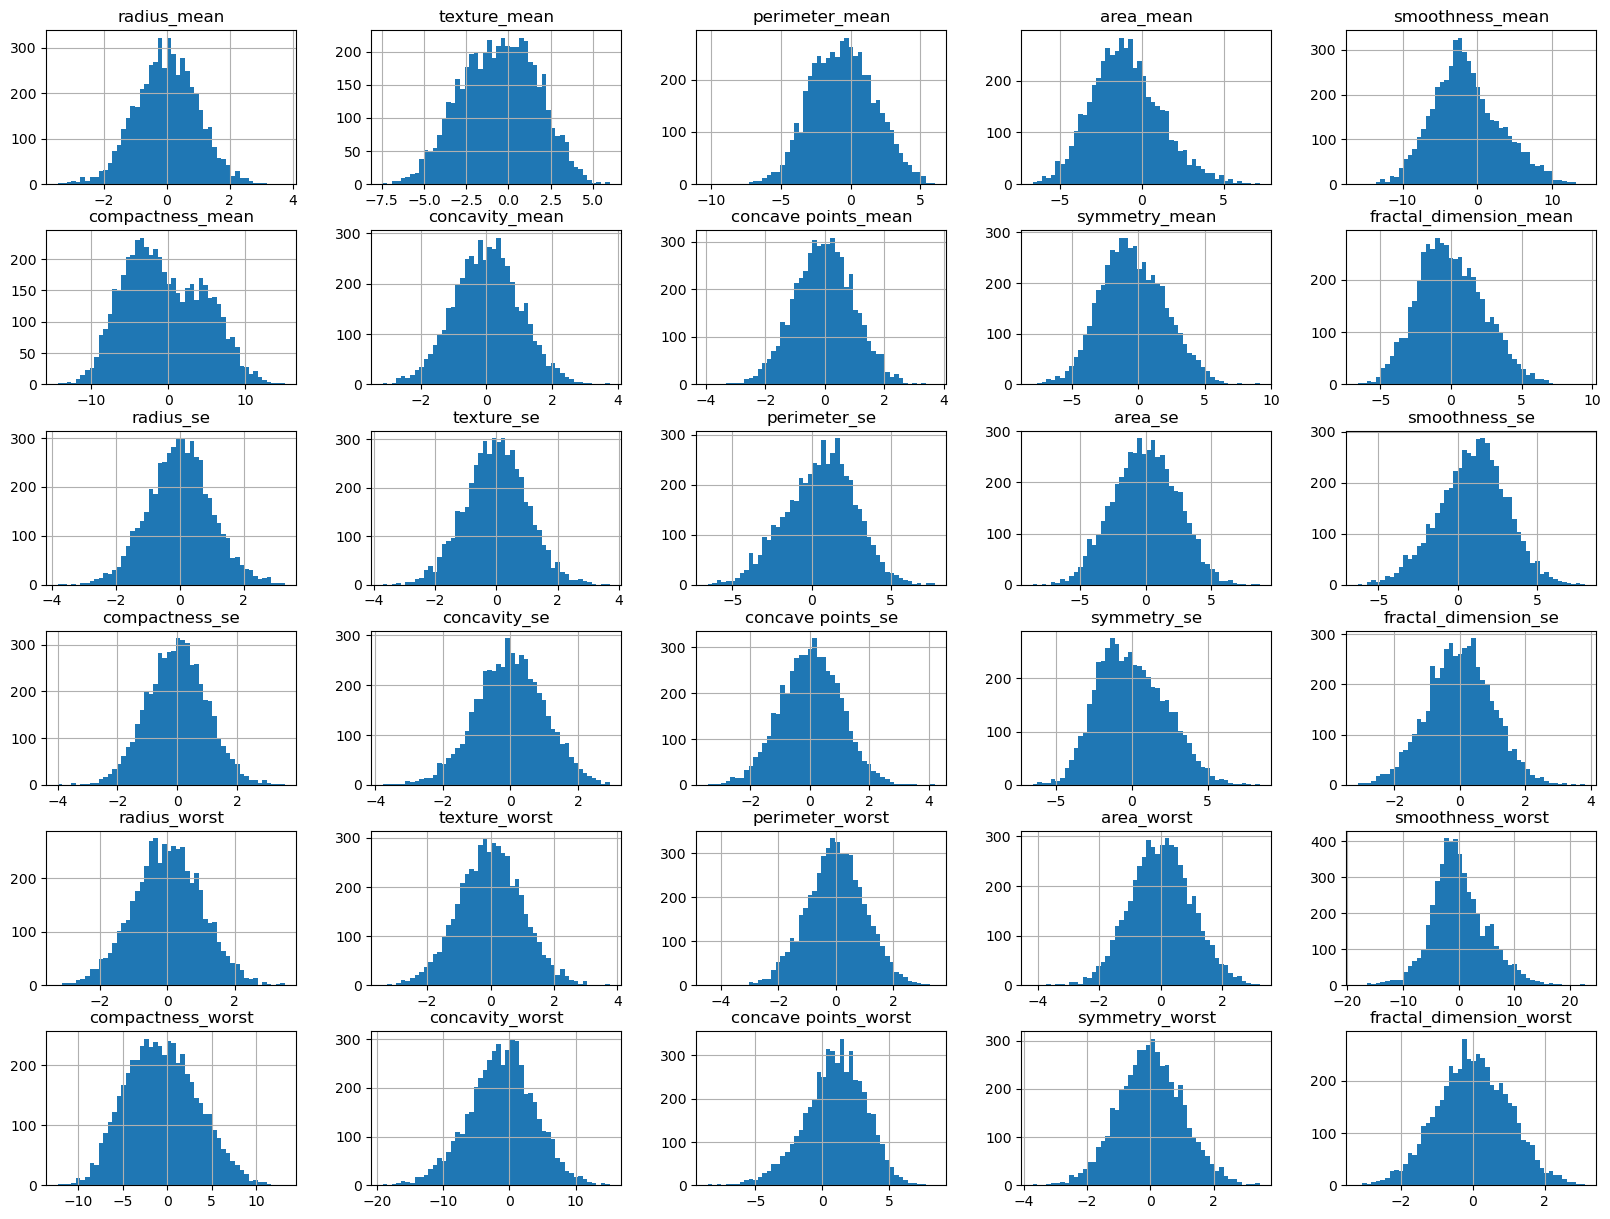

In [17]:
# visualizing the distribution of our numerical columns
df.hist(bins=50, figsize=(20,15))
plt.show()

In [18]:
# The Total Malignant and Benign Diagnosis in the Dataset
# 1866 Benign Diagnosis
# 3149 Malignant Diagnosis
# 0 Means the Tumor is not Cancerous
# 1 Means the Tumor is Cancerous
df['diagnosis'].value_counts()

diagnosis
M    3149
B    1866
Name: count, dtype: int64

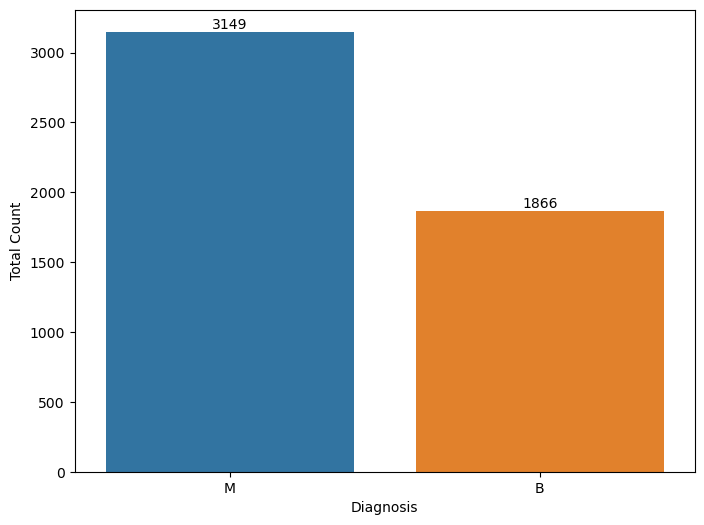

In [19]:
#Showing Data Distribution of the only categorical columns Diagnosis
plt.figure(figsize=(8, 6))
diag = sns.countplot(x='diagnosis', data=df, palette=['#1f77b4', '#ff7f0e'])
diag.bar_label(diag.containers[0])
diag.bar_label(diag.containers[1])
plt.xlabel("Diagnosis")
plt.ylabel("Total Count")
plt.show()


# FEATURES ENGINEERING

In [20]:
# There are 3 sets of Mean Columns in the Dataset which are the Mean Columns, Standard Error Columns and Worst Columns
# We will be using the Mean Columns for the Prediction but Pairplot will be used to show the relationship between the Mean Columns, Standard Error Columns and Worst Columns with the Diagnosis Column
# and the Diagnosis Column

#Getting Mean Colon Lump with Diagnosis
mean_col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Standard deviation Lump Columns with diagnosis
standarderror_col = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

# Getting Worst Case Lump column with diagnosis
worst_col = ['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']



In [21]:
print("-----------------------------------")
print('Mean set of all features')
print(mean_col)
print(len(mean_col), 'features')
print("-----------------------------------")
print('Standard Error set of all features')
print(standarderror_col)
print(len(standarderror_col), 'features')
print("------------------------------------")
print('Worst set of all features')
print(worst_col)
print(len(worst_col), 'features')


-----------------------------------
Mean set of all features
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
10 features
-----------------------------------
Standard Error set of all features
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
10 features
------------------------------------
Worst set of all features
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
10 features


<Axes: >

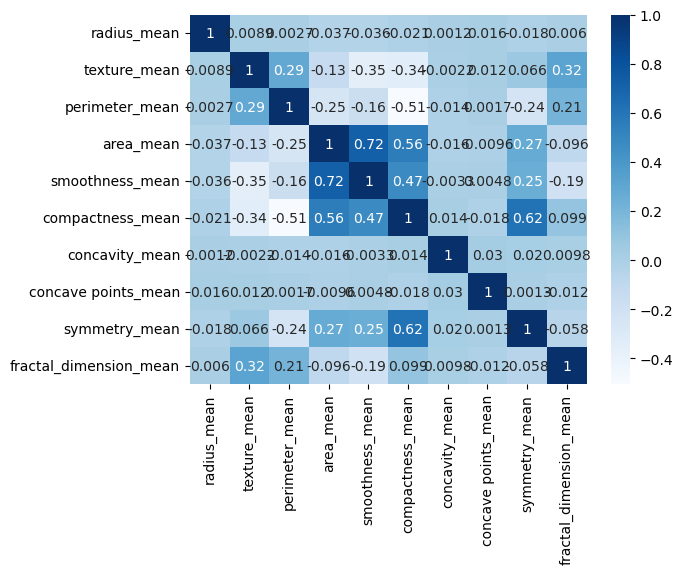

In [22]:
sns.heatmap(df[mean_col].corr(),annot=True,cmap='Blues')

<Axes: >

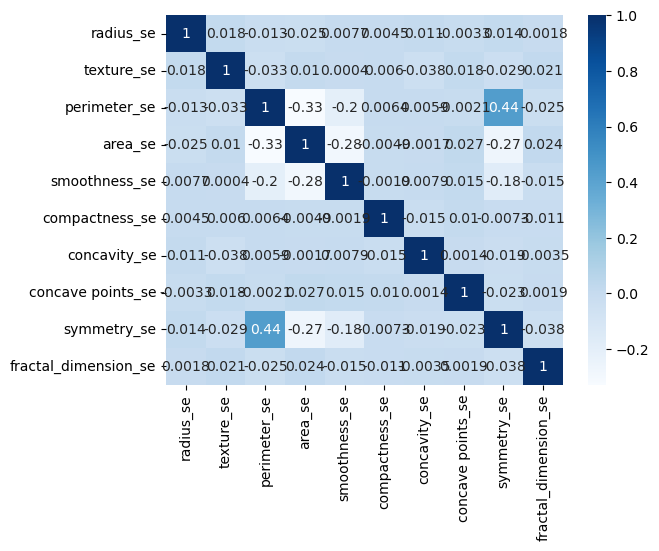

In [23]:
sns.heatmap(df[standarderror_col].corr(),annot=True,cmap='Blues')

<Axes: >

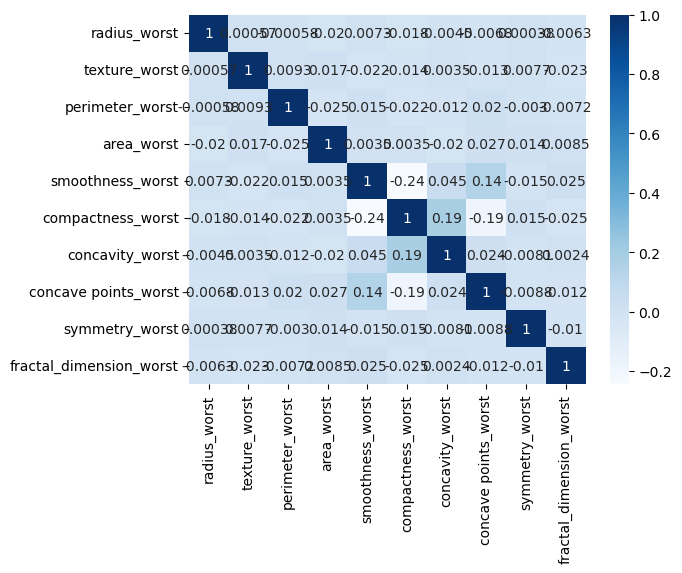

In [24]:
sns.heatmap(df[worst_col].corr(),annot=True,cmap='Blues')

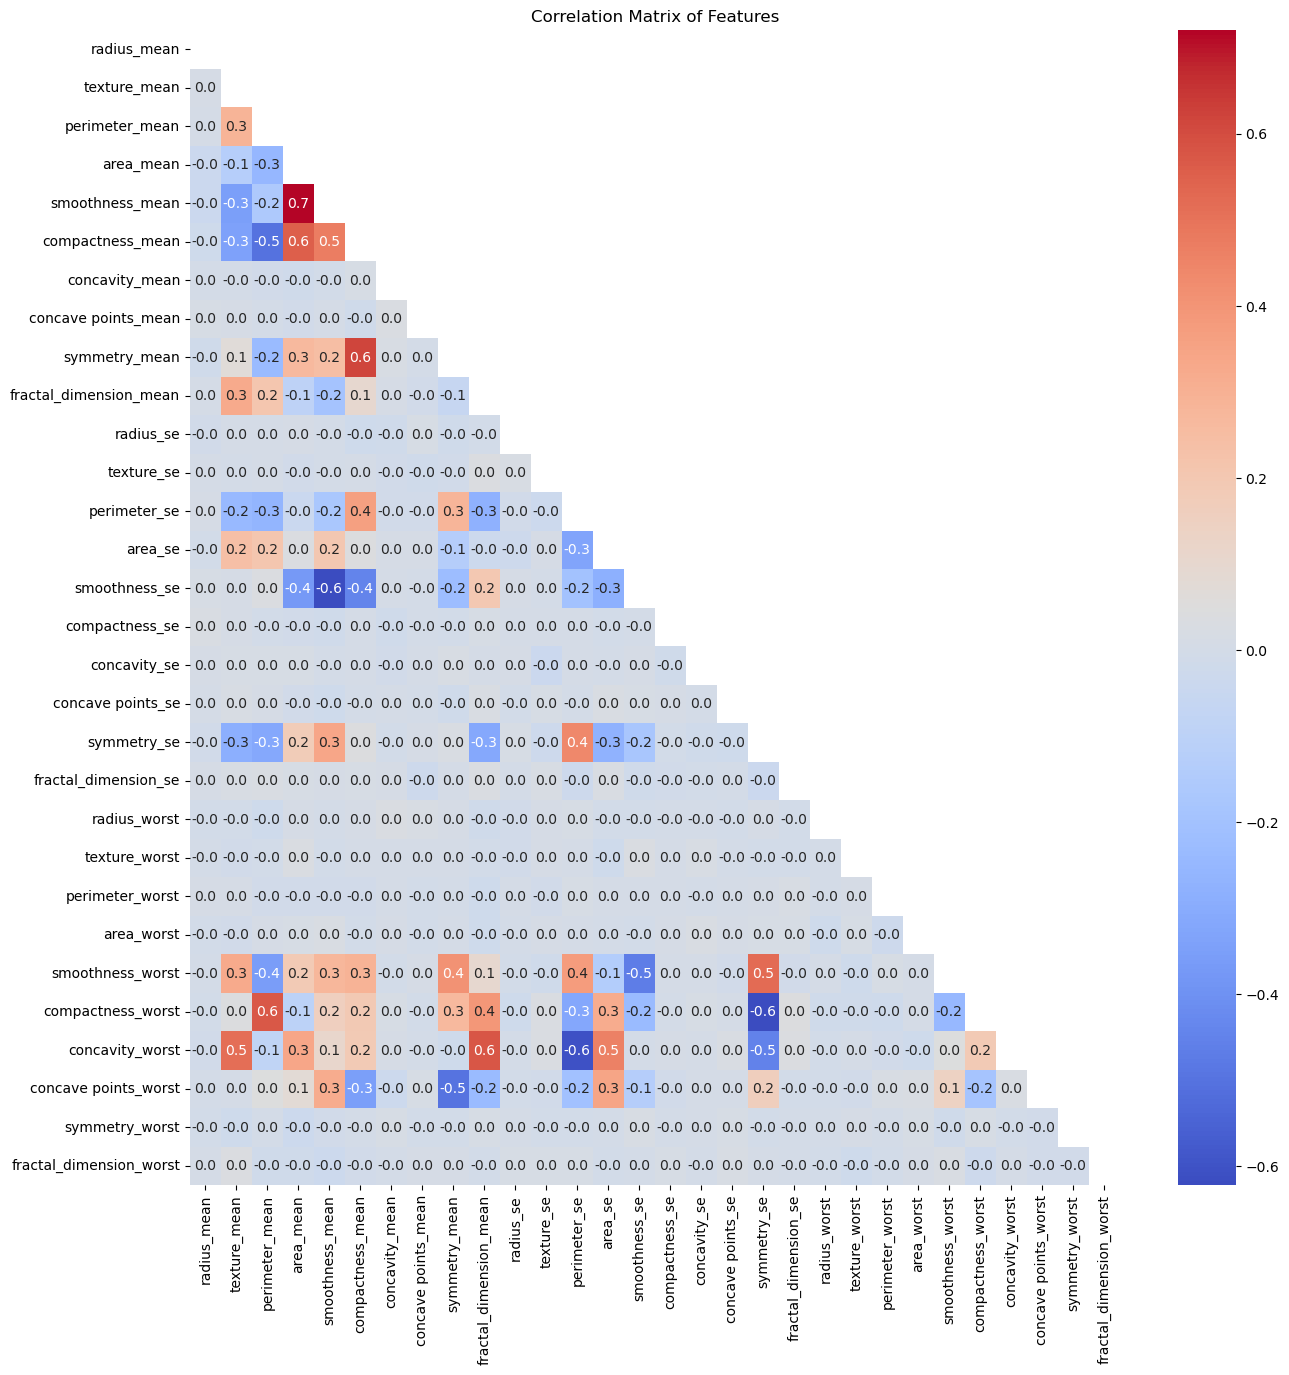

In [25]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.drop(columns=['diagnosis'], errors='ignore').corr(), cmap='coolwarm', annot=True, fmt='.1f', cbar=True, mask=np.triu(np.ones_like(df.drop(columns=['diagnosis'], errors='ignore').corr(), dtype=bool)))
plt.title("Correlation Matrix of Features")
plt.show()


# Univariate analysis on each features to discover those which allow to discretize the variable 'diagnosis

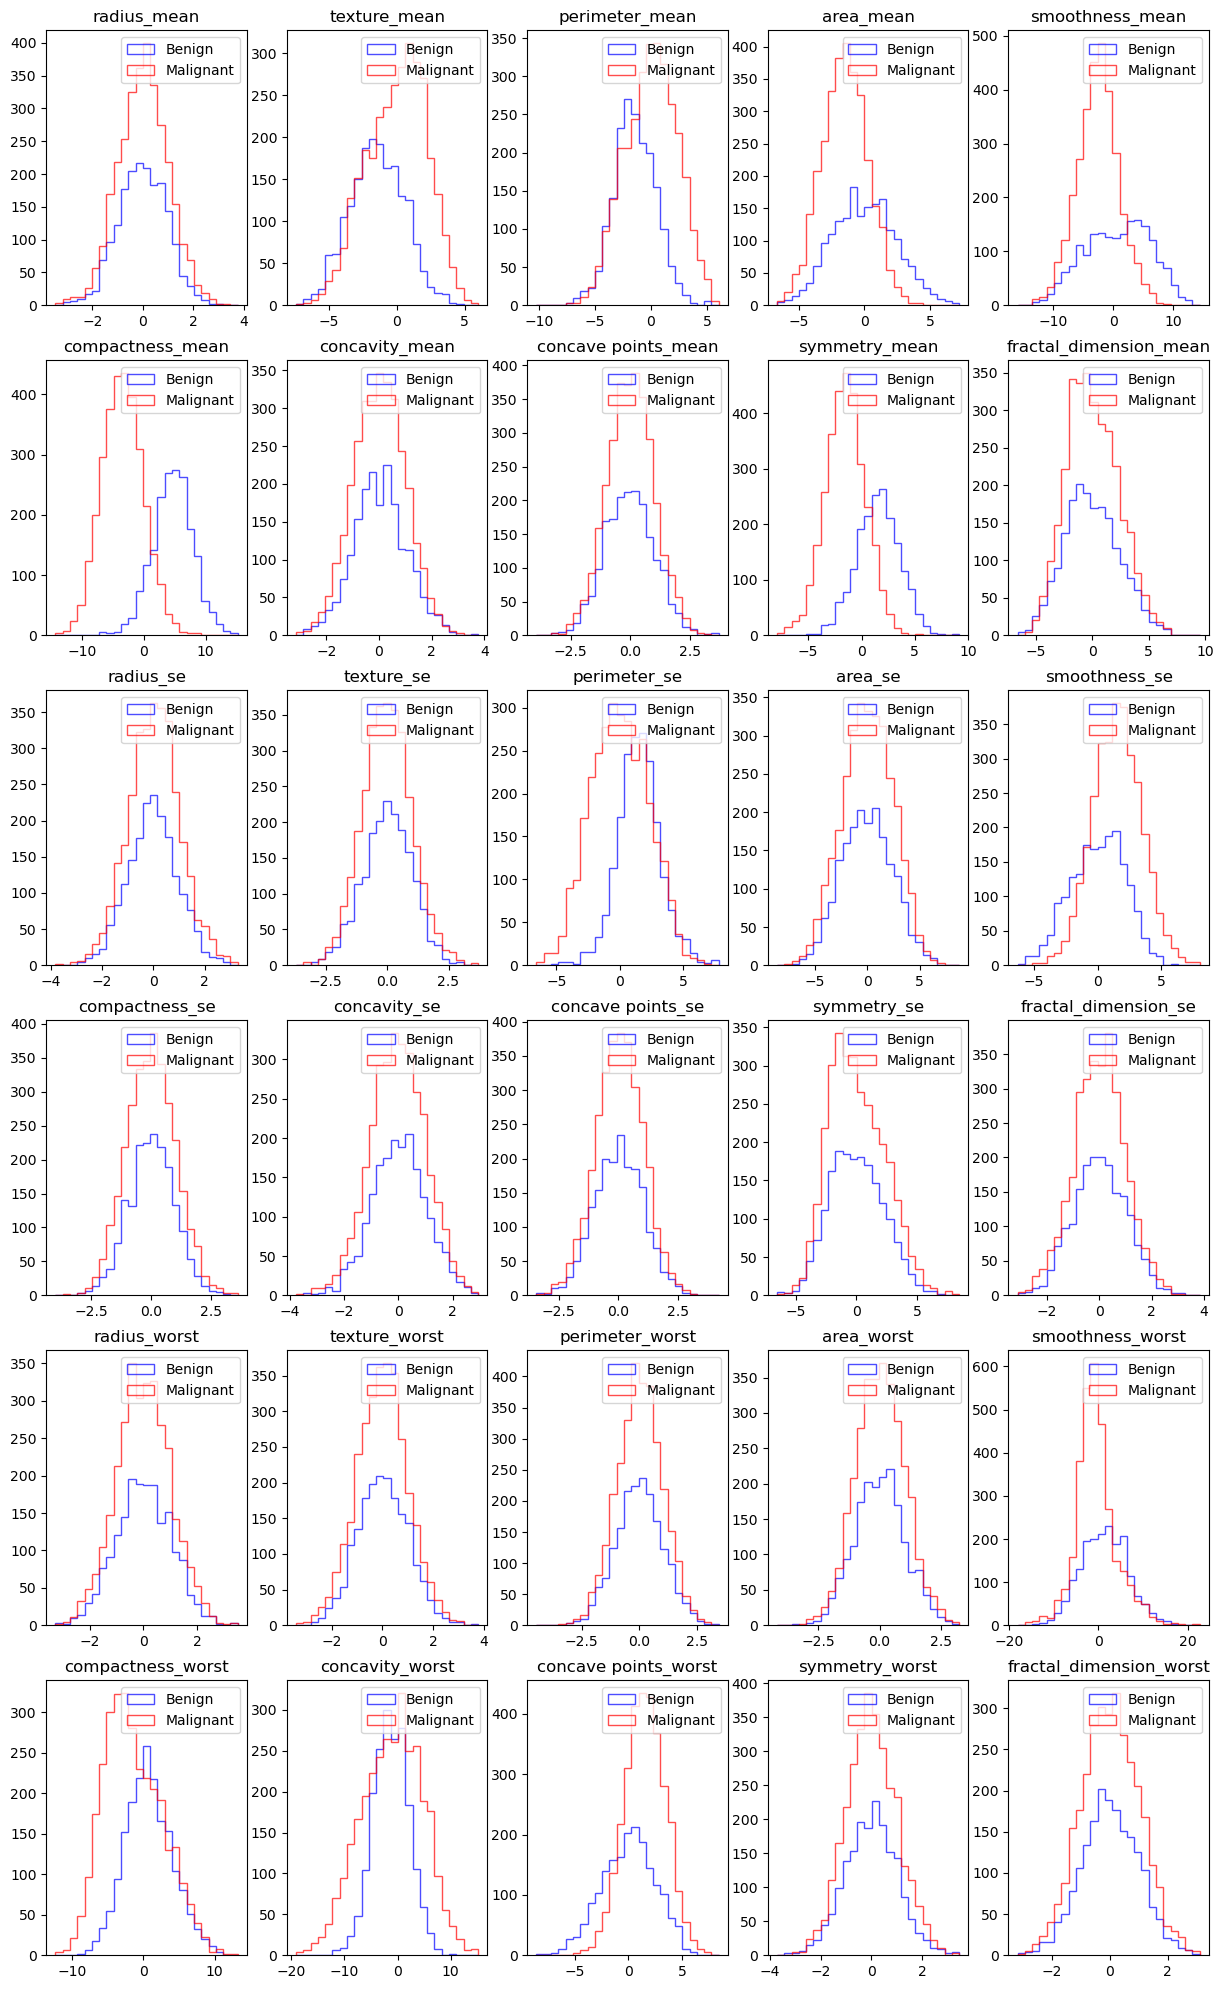

In [26]:
predict = df.diagnosis.unique() # unique values from diagnosis features : 1 and 0
dia_label=['Malignant', 'Benign'] # labels

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15,25)) # axis configuration : 30 features on 6 * 5 charts
i=0
axes = axes.ravel()
for idx,ax in enumerate(axes): # for each chart
    col=df.columns[i+1]
    i=i+1
    ax.hist([df.loc[df.diagnosis == x, col] for x in predict], label=dia_label, bins=25,stacked=False, alpha=0.7,color=['r','b'], histtype='step') # plot the feature histogram 
    ax.legend(loc='upper right') # legend of each chart
    ax.set_title(col) # title

plt.show() # show the 30 charts

# Checking and Removing Outliers

Numerical columns for outlier detection: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Column: radius_mean
Lower bound: -2.65, Upper bound: 2.65
Number of outliers: 52
Outlier values:
id
32     -2.715095
52      2.680599
59      2.943648
188    -2.731540
269    -2.904986
332     2.763914
355    -3.076384
430    -3.045871
693    -3.110002
710    -2.722669
728    -2.934700
852    -3.195942
975    -2.781171
1022   -3.464809
1056    3.181083
1096   -3.030890
1193   -2.675741
1222   -2.722050
1265  

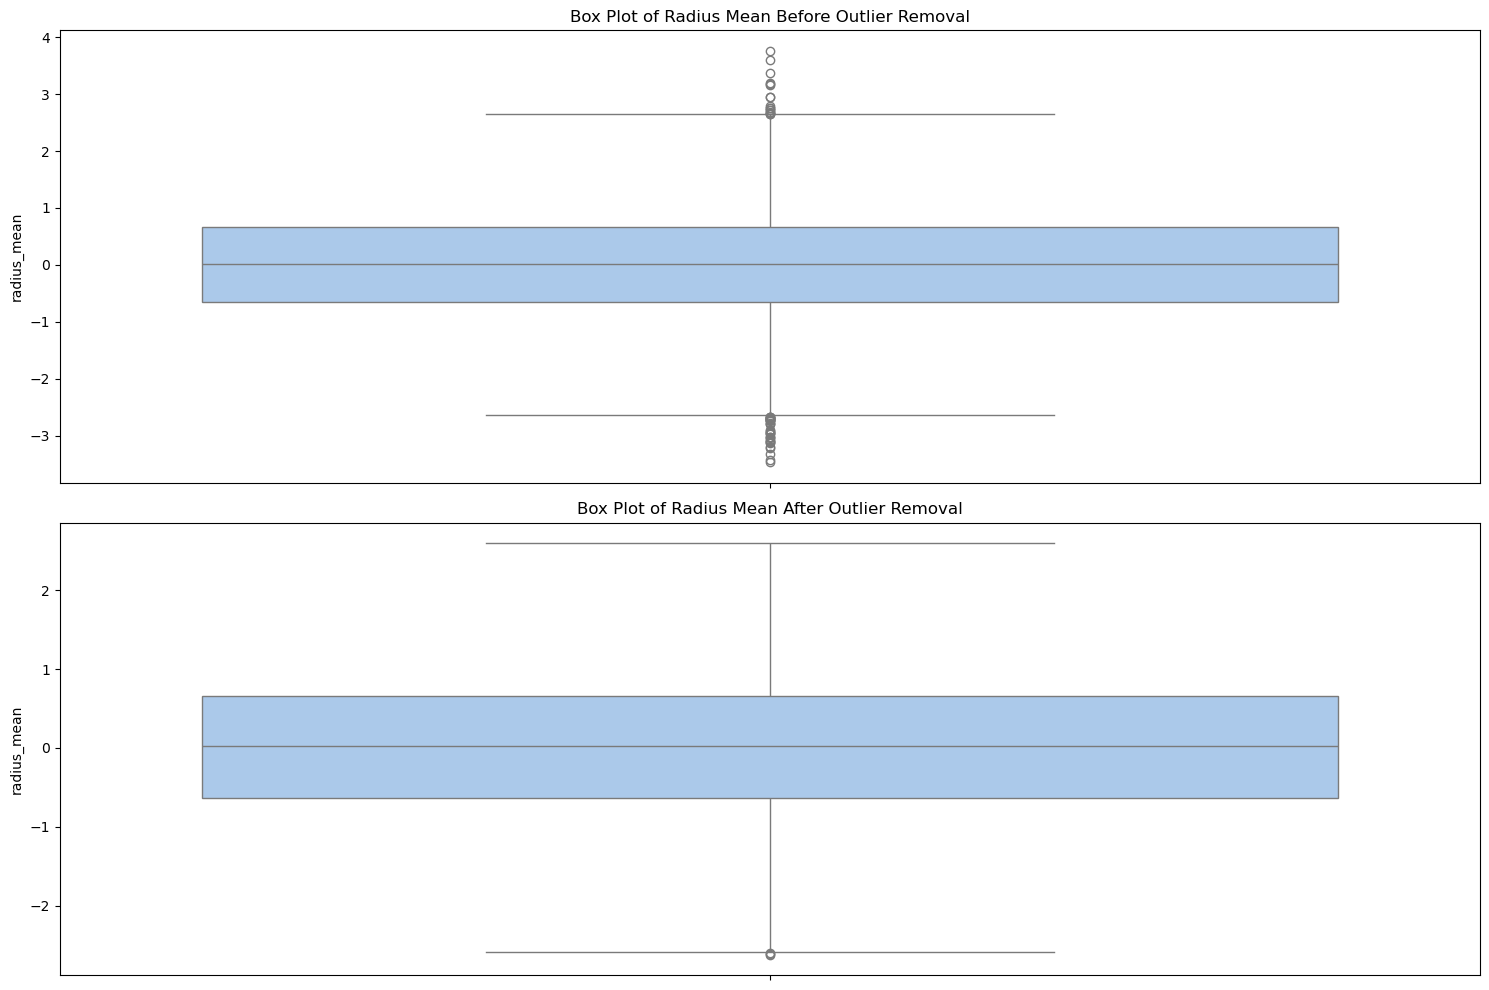

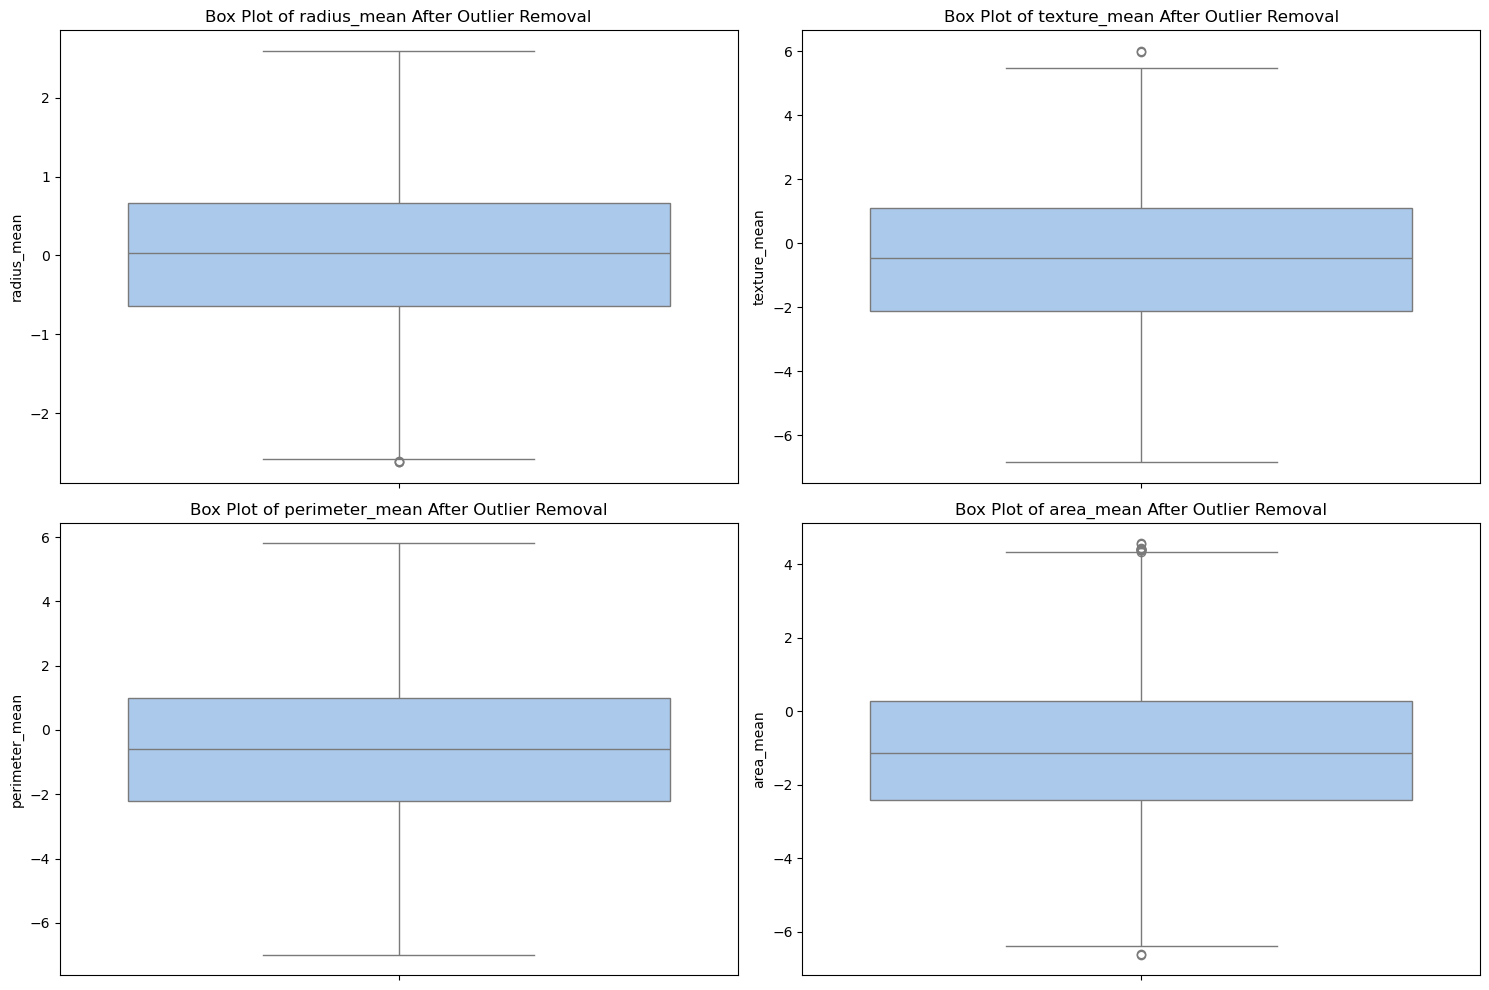

Cleaned dataset saved as 'tunor_cancer_no_outlier.csv'


In [27]:
# Drop non-numeric or identifier columns (e.g., 'id', 'diagnosis')
if 'id' in df.columns:
    data = df.drop(columns=['id'])
if 'diagnosis' in df.columns:
    data_numeric = df.drop(columns=['diagnosis'])
else:
    data_numeric = data

# Select numerical columns for outlier detection
numerical_cols = data_numeric.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns for outlier detection: {numerical_cols}")

# Function to detect and remove outliers using IQR method
def remove_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"\nColumn: {column}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier values:\n{outliers}")
    
    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned, outliers

# Initialize the cleaned dataset
data_cleaned = df.copy()

# Apply outlier removal to each numerical column
for col in numerical_cols:
    data_cleaned, outliers = remove_outliers_iqr(data_cleaned, col, multiplier=1.5)

# Display the number of rows removed
rows_removed = len(df) - len(data_cleaned)
print(f"\nTotal rows before: {len(df)}")
print(f"Total rows after removing outliers: {len(data_cleaned)}")
print(f"Number of rows removed: {rows_removed}")

# --- Visualization: Box Plots Before and After ---
plt.figure(figsize=(15, 10))

# Before removal (using a key feature, e.g., 'radius_mean')
plt.subplot(2, 1, 1)
sns.boxplot(data=df, y='radius_mean', palette='pastel')
plt.title('Box Plot of Radius Mean Before Outlier Removal')

# After removal
plt.subplot(2, 1, 2)
sns.boxplot(data=data_cleaned, y='radius_mean', palette='pastel')
plt.title('Box Plot of Radius Mean After Outlier Removal')

plt.tight_layout()
plt.show()

# Optional: Visualize multiple features after removal
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:4], 1):  # Limit to first 4 columns for clarity
    plt.subplot(2, 2, i)
    sns.boxplot(data=data_cleaned, y=col, palette='pastel')
    plt.title(f'Box Plot of {col} After Outlier Removal')
plt.tight_layout()
plt.show()

# Save the cleaned dataset
data_cleaned.to_csv('tunor_cancer_no_outlier.csv', index=False)
print("Cleaned dataset saved as 'tunor_cancer_no_outlier.csv'")

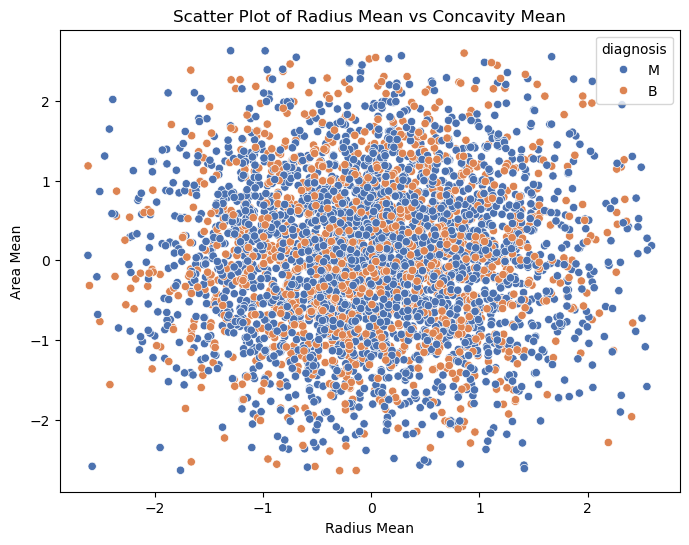

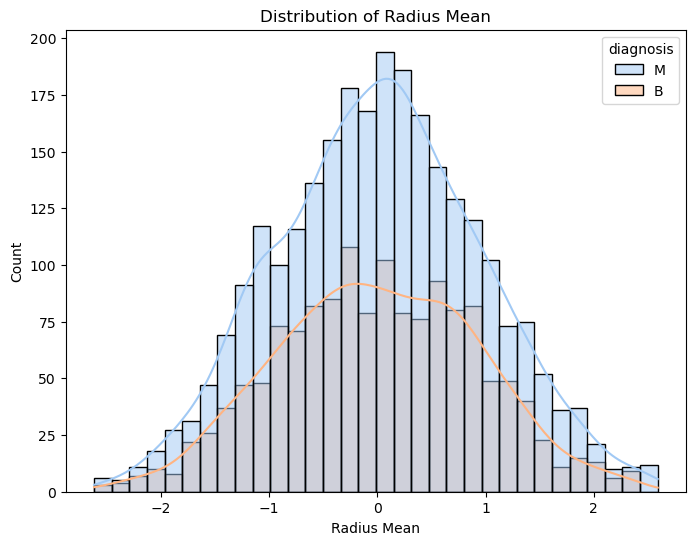

In [28]:
# --- Visualization 2: Scatter Plot ---
# Scatter plot to visualize outliers in two dimensions
df = pd.read_csv('tunor_cancer_no_outlier.csv')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='radius_mean', y='concavity_mean', hue='diagnosis' if 'diagnosis' in df.columns else None, palette='deep')
plt.title('Scatter Plot of Radius Mean vs Concavity Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.show()

# --- Visualization 3: Histogram with KDE ---
# Histogram to check distribution and potential outliers
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='radius_mean', hue='diagnosis' if 'diagnosis' in df.columns else None, kde=True, palette='pastel')
plt.title('Distribution of Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Count')
plt.show()

# Univariate analysis conclusion

I can see that some variables allow more easily than others to discriminate between cancerous and healthy cells.

For example the variables: concave points_mean, concave points_se, concavity_mean, concavity_se, concave points_worst, concavity_worst, compactness_mean, compactness_worst have a big influence on the final prediction due to the least overlap and the strongest separation, making them the most promising for classification tasks compared to other variables such as symmetry_mean, fractal_dimension_mean, smoothness_mean, texture_se, smoothness_se, symmetry_se, texture_worst, smoothness_worst, symmetry_worst ,fractal_dimension_worst".

We will therefore remove these features because they do not allow us to determine if a tumor is cancerous or not.



In [29]:
#The features 'radius', 'perimeter' and 'area' are strongly correlated, which is not surprising given the geometrical relationship 
# by which they are linked. I decide to keep only the 'perimeter' variable.

perimeter_area_drop_columns=['perimeter_mean','perimeter_se','perimeter_worst','area_mean','area_se','area_worst']
hard_descriminative_drop_colum = ['texture_mean', 'symmetry_mean', 'fractal_dimension_mean', 'smoothness_mean',
    'texture_se', 'smoothness_se', 'symmetry_se',
    'texture_worst', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst', 'compactness_mean', 'concave points_mean', 'concavity_worst']



to_be_dropped = ['perimeter_mean','area_mean','perimeter_se','area_se','perimeter_worst','area_worst', 'texture_mean', 'concave points_mean', 
 'concave points_worst', 'compactness_mean', 'compactness_worst', 'symmetry_mean','symmetry_se', 'symmetry_worst', 'concave points_se',
  ' texture_se' , 'texture_worst' , 'smoothness_se', 'smoothness_worst'  ]

tumor_cancerous = df

print('Now the data set is only composed of ', len(tumor_cancerous.columns), 'features')


Now the data set is only composed of  31 features


In [30]:
tumor_cancerous.shape

(4079, 31)

In [31]:
tumor_cancerous.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
color_function = {'B': "blue", 'M': "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = tumor_cancerous["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(tumor_cancerous.iloc[:,2:], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

In [ ]:
#Next We show the corellation between the Mean Columns and the Diagnosis Column
#The Pairplot will show the relationship between the Mean Columns and the Diagnosis Column

sns.pairplot(tumor_cancerous, hue='diagnosis', palette={'M': 'red', 'B': 'blue'})
plt.show()

Most of the remaining features are now poorly correlated with each other variables.

In [32]:
print('The most important final features for breast cancer detection are : ')
list(tumor_cancerous.columns.values[1:])

The most important final features for breast cancer detection are : 


['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

# ENCODING

In [33]:
#Label Encoding the Diagnosis Column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Transformation of Categorical Data into Numberical Data

tumor_cancerous['diagnosis'] = labelencoder.fit_transform(tumor_cancerous['diagnosis'])
tumor_cancerous.head()
	


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.425053,5.965067,1.878999,-1.922577,-8.191107,-9.662919,-0.619291,-1.315248,-4.107378,...,0.615896,2.002757,-0.201908,0.120528,0.035929,-0.582654,10.078263,3.396570,-0.474207,0.938795
1,0,1.624526,0.466168,1.600550,2.200664,4.272945,2.390065,0.614031,-0.314448,1.867168,...,-0.118669,-1.379621,-1.324658,-0.282837,5.802867,-0.325060,-4.156908,1.968221,-0.054791,0.076663
2,1,-1.124956,-2.165492,-0.215090,-1.795210,-6.011122,-7.283305,0.147977,-1.520045,-4.330120,...,1.001215,0.350980,-0.173384,1.782559,-2.723687,-6.602257,-8.789461,5.394188,0.201087,-0.310054
3,0,-0.349488,-1.915211,-2.885086,-0.182034,1.586092,1.645780,-0.532385,-1.009785,-1.919263,...,-0.538012,1.444644,0.758448,-0.303827,4.672285,-5.195357,-3.044978,1.988163,-0.465882,-0.207049
4,0,-1.037911,-0.911027,-2.602170,-1.415689,2.071861,2.604193,-0.534510,-0.966398,2.045196,...,-0.081568,0.684680,0.766711,-0.594328,2.393778,-0.286439,-2.898318,0.016536,0.883488,0.194038


In [34]:
# New Datasets after Transformation
tumor_cancerous.head(15)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.425053,5.965067,1.878999,-1.922577,-8.191107,-9.662919,-0.619291,-1.315248,-4.107378,...,0.615896,2.002757,-0.201908,0.120528,0.035929,-0.582654,10.078263,3.396570,-0.474207,0.938795
1,0,1.624526,0.466168,1.600550,2.200664,4.272945,2.390065,0.614031,-0.314448,1.867168,...,-0.118669,-1.379621,-1.324658,-0.282837,5.802867,-0.325060,-4.156908,1.968221,-0.054791,0.076663
2,1,-1.124956,-2.165492,-0.215090,-1.795210,-6.011122,-7.283305,0.147977,-1.520045,-4.330120,...,1.001215,0.350980,-0.173384,1.782559,-2.723687,-6.602257,-8.789461,5.394188,0.201087,-0.310054
3,0,-0.349488,-1.915211,-2.885086,-0.182034,1.586092,1.645780,-0.532385,-1.009785,-1.919263,...,-0.538012,1.444644,0.758448,-0.303827,4.672285,-5.195357,-3.044978,1.988163,-0.465882,-0.207049
4,0,-1.037911,-0.911027,-2.602170,-1.415689,2.071861,2.604193,-0.534510,-0.966398,2.045196,...,-0.081568,0.684680,0.766711,-0.594328,2.393778,-0.286439,-2.898318,0.016536,0.883488,0.194038
5,1,0.120262,-0.717278,0.620721,-1.882631,-2.937786,-7.030888,-0.114517,0.257259,-2.082970,...,-0.068113,-0.440598,-0.325272,-1.348685,-3.029338,-2.052970,-7.318972,3.325497,-1.128341,-0.801243
6,1,1.594249,-2.780712,0.631692,-2.207594,-6.048811,-7.724051,-1.147494,-0.166100,-4.150421,...,0.099114,-0.648779,0.006762,1.223610,-10.862417,-3.683523,-6.576865,1.173127,1.623558,1.083063
7,0,2.181834,-2.696210,-0.695498,-2.062246,-2.393498,5.749082,0.348183,-0.715832,0.344150,...,-1.197448,1.943613,0.965959,0.191543,-5.462174,7.061307,2.934352,-1.184469,1.315890,0.005183
8,1,-0.207995,1.111825,4.268755,-1.922459,-2.539982,-4.521649,0.255785,-1.090797,-1.883274,...,-1.761533,0.724839,0.450488,-0.156836,-2.148749,7.632274,1.149732,2.078927,0.571753,-1.177050
9,0,0.685827,-1.299916,-0.062345,1.468779,2.882836,9.448595,-0.818898,-0.490464,4.363181,...,0.085608,0.581271,0.011758,-0.586074,-2.554882,3.955835,-0.677487,-1.366290,-0.257480,0.064067


In [35]:
# New Datasets after Transformation
tumor_cancerous.tail(15)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
4064,1,-0.494533,3.771830,3.383130,-1.792386,-8.082895,-3.062589,1.616423,0.829370,-1.687576,...,1.213404,0.498779,-0.336244,-0.726297,1.072199,2.150312,3.778733,-1.455220,-2.204276,-1.759023
4065,0,0.382513,-3.818279,-4.364111,-1.460515,-0.260180,4.943482,0.930995,-0.360500,-1.457430,...,0.287663,1.457797,0.981925,-1.488907,-4.210005,3.047809,6.032766,3.824446,0.236345,-0.331069
4066,1,0.528068,0.773455,-1.485432,-1.045298,-4.599593,-6.378435,-0.568372,-0.961604,0.474453,...,0.324944,0.407025,-0.221194,-0.439656,-2.087818,-6.037491,-3.283846,-1.003937,-0.336319,0.070696
4067,0,-0.014993,0.064377,-2.233629,-3.612287,-8.020279,3.663800,-0.411889,0.031073,-1.221482,...,-0.394414,-0.731186,0.110324,0.124867,2.594736,1.087612,3.045666,-0.981321,-1.744903,1.476718
4068,0,0.695010,-2.366287,0.723767,1.455183,4.871106,1.833459,-0.791226,1.355690,1.495879,...,2.096039,0.696793,-1.772711,-0.092063,-2.150174,-0.028853,-5.273351,0.286680,-0.189200,1.212348
4069,0,-0.270827,-3.083328,-2.750945,-1.760695,-2.066194,6.308976,-0.039445,-0.291613,-0.839091,...,0.365684,-0.434034,0.996202,1.277861,-3.274723,3.418268,3.265869,1.085428,0.774265,0.853345
4070,0,0.571774,-3.350725,0.610376,1.224534,1.926152,9.450397,-0.914023,0.052516,0.968827,...,-0.459039,-0.374149,1.417832,0.742749,-5.844507,7.647307,1.706661,-2.696538,0.528448,0.871138
4071,1,-0.890709,-1.744667,1.154576,-1.841649,-0.605914,-8.730957,1.014950,0.150315,-1.641741,...,-0.484623,-0.873845,1.298884,0.198301,-6.758636,-0.993272,-5.959246,-0.792262,0.962370,0.849971
4072,0,0.607632,0.730504,-1.387169,-5.066571,-8.988985,4.449139,1.268025,0.570505,3.330512,...,-0.144053,0.040834,-1.420948,1.281484,8.610842,1.644835,-4.762643,-3.009873,0.867389,0.014823
4073,1,0.429157,1.276377,3.719493,-5.213462,-4.329410,-8.152545,-0.707879,0.264728,-4.200273,...,0.435248,-0.933733,1.771944,0.316410,-1.374265,3.341682,-4.045831,1.980894,0.003340,0.350872


In [36]:
# New Datasets Information after Transformation
tumor_cancerous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                4079 non-null   int32  
 1   radius_mean              4079 non-null   float64
 2   texture_mean             4079 non-null   float64
 3   perimeter_mean           4079 non-null   float64
 4   area_mean                4079 non-null   float64
 5   smoothness_mean          4079 non-null   float64
 6   compactness_mean         4079 non-null   float64
 7   concavity_mean           4079 non-null   float64
 8   concave points_mean      4079 non-null   float64
 9   symmetry_mean            4079 non-null   float64
 10  fractal_dimension_mean   4079 non-null   float64
 11  radius_se                4079 non-null   float64
 12  texture_se               4079 non-null   float64
 13  perimeter_se             4079 non-null   float64
 14  area_se                 

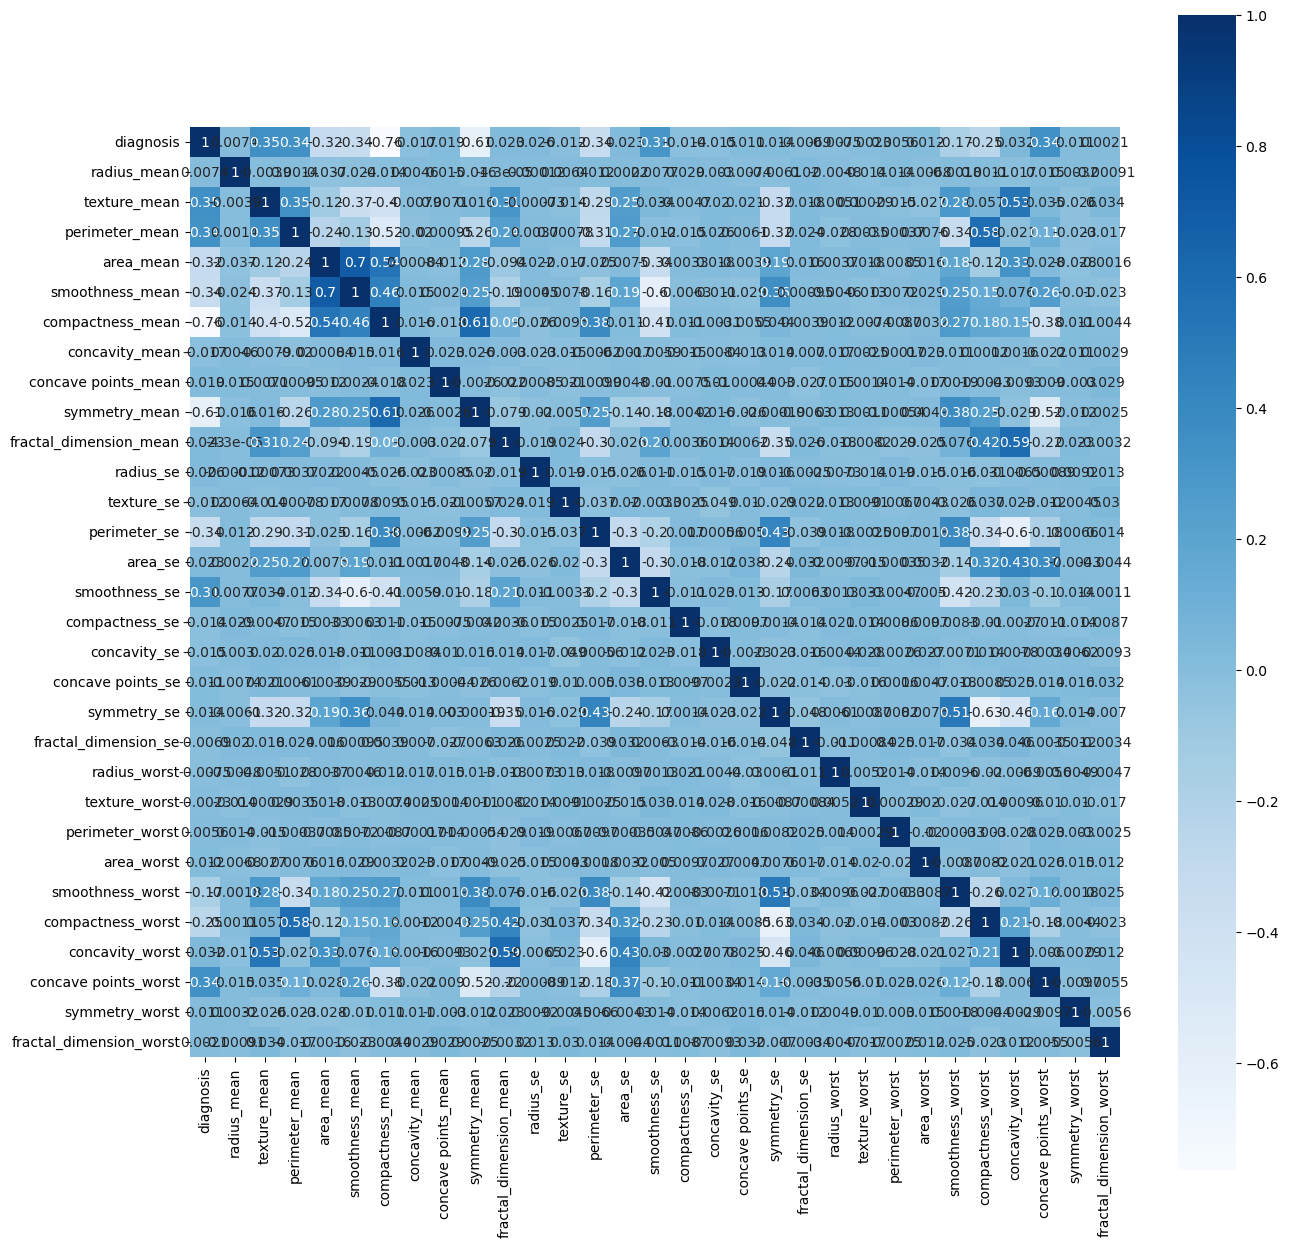

In [37]:
#New Datasets Correlation after Transformation
tumor_cancerous.corr()
fig = plt.subplots(figsize = (15,15))
sns.heatmap(tumor_cancerous.corr(), square = True, cmap = 'Blues', annot = True)
plt.show()

# Spliting Datas 20% test 80% train

In [38]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets
# The Training Set is 80% of the Dataset while the Test Set is 20% of the Dataset
# The Random State is set to 42
x = tumor_cancerous.drop('diagnosis', axis = 1)#features
y = tumor_cancerous['diagnosis']#target variable
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2,random_state=22)



print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)
print("Shape of Output Train set:", y_train.shape)
print("Shape of Output Test set:", y_test.shape)
print("Count of Training set according to M & B:", y_train.value_counts())
print("Count of Test set according to M & B:", y_test.value_counts())

Shape of training set: (3263, 30)
Shape of test set: (816, 30)
Shape of Output Train set: (3263,)
Shape of Output Test set: (816,)
Count of Training set according to M & B: diagnosis
1    2121
0    1142
Name: count, dtype: int64
Count of Test set according to M & B: diagnosis
1    521
0    295
Name: count, dtype: int64


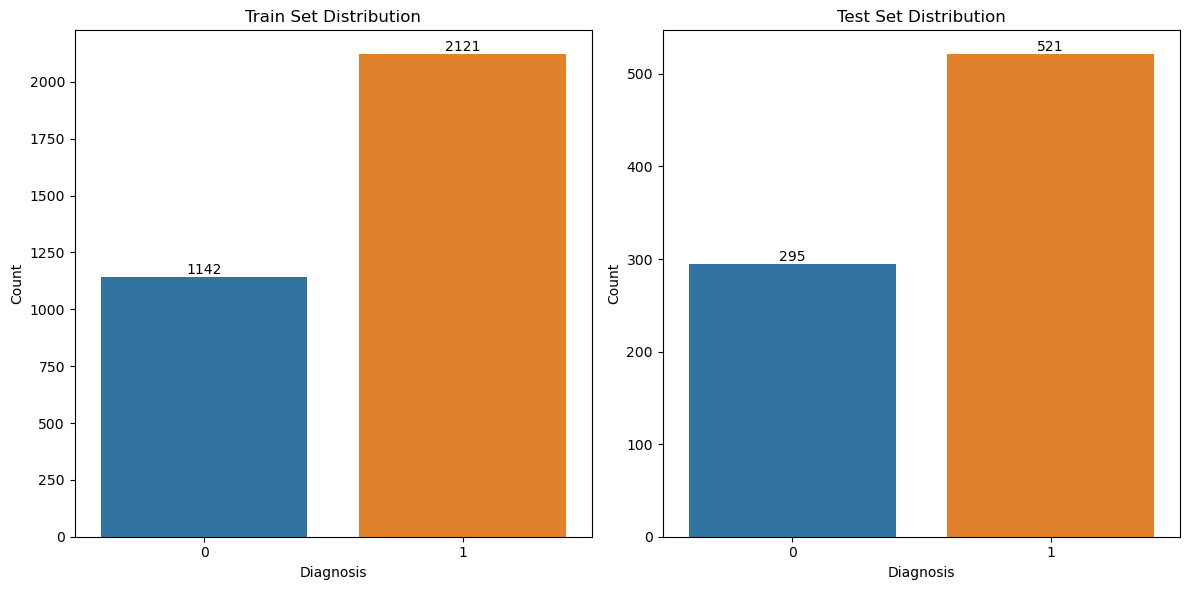

In [39]:
# Plotting the distribution of the train and test sets

plt.figure(figsize=(12, 6))

# Train set distribution
plt.subplot(1, 2, 1)
diagtrain = sns.countplot(x=y_train, palette=['#1f77b4', '#ff7f0e'])
diagtrain.bar_label(diagtrain.containers[0])
diagtrain.bar_label(diagtrain.containers[1])
plt.title('Train Set Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Test set distribution
plt.subplot(1, 2, 2)
diagtest = sns.countplot(x=y_test, palette=['#1f77b4', '#ff7f0e'])
diagtest.bar_label(diagtest.containers[0])
diagtest.bar_label(diagtest.containers[1])
plt.title('Test Set Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')

X_under, y_under = undersample.fit_resample(X_train, y_train)

y_under.value_counts()


In [40]:
from sklearn.ensemble import RandomForestClassifier


rf_model=RandomForestClassifier(n_estimators=100, random_state=22, max_depth=5)
rf_model.fit(X_under,y_under)

NameError: name 'X_under' is not defined

In [ ]:
predictions= rf_model.predict(X_test)

In [ ]:
predictions

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

x_train = pd.DataFrame(x_train_scaled, columns=X_train.columns)
x_test = pd.DataFrame(x_test_scaled, columns=X_test.columns)


display(x_train.head(15))
display(x_test.head(15))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.336392,-1.483374,-0.171161,-1.311840,-0.307825,-0.506910,-0.333020,-1.366585,-1.022480,0.809281,...,-0.643643,-0.246791,-1.183817,1.849045,0.052055,-0.871926,-1.113616,0.025696,0.352879,-1.442167
1,0.382410,0.890620,-0.774372,-0.578946,-1.673784,0.579757,0.044221,-0.901996,1.224288,0.355608,...,-1.021792,-0.289388,0.293781,0.197673,1.330914,-0.454282,-0.581515,-1.669548,-1.174427,0.053655
2,-0.276122,-2.587133,0.651971,2.602001,2.712268,1.704828,-1.031443,-0.026905,1.215426,-0.239577,...,0.303130,-1.108640,-0.390266,1.745675,-0.885731,0.483075,-0.598487,0.563717,0.743824,0.771110
3,-0.420342,-0.421120,0.527744,-0.121037,-0.261555,1.446571,2.084052,-0.377408,1.052594,0.953346,...,-0.241180,0.200790,-1.925231,-1.659729,-0.151881,1.481154,-0.384774,-2.411642,0.655530,-0.424202
4,-0.187135,0.198539,-0.396198,1.469599,1.852501,1.444243,0.283342,0.081054,1.441121,-1.239872,...,0.512964,-0.376607,-0.047128,-0.576394,1.407007,0.580261,0.101639,0.850586,-0.650730,0.988753
5,-1.005933,0.988034,1.578940,-0.397367,-0.283541,-0.635405,0.734476,0.216390,-0.401215,1.014803,...,0.555351,0.742240,1.884024,0.424092,-0.088247,1.147676,0.425273,-0.147626,0.665256,-0.909094
6,0.060836,1.521963,0.370511,-1.235851,-1.198858,-0.847301,0.173770,-0.684701,-1.284976,0.509466,...,0.855028,-0.071740,-1.075867,0.661381,-0.330948,0.160752,1.237786,-0.172788,1.397055,0.384737
7,-0.023963,0.631519,-0.044300,0.241494,1.481435,0.673587,-1.386821,0.458766,2.531501,-1.511034,...,-0.202185,-0.234747,0.813882,-1.468066,1.480357,1.067653,-0.480895,0.058239,0.653744,1.691718
8,1.002582,-1.101543,-0.390143,-1.380339,-1.118937,-0.485548,-1.046840,-0.135507,-0.432231,-0.498739,...,0.589581,0.054109,-0.478576,-1.191242,-0.316101,-0.801348,-1.622733,0.309237,0.528458,2.038957
9,0.177107,-0.962567,-0.329897,0.034736,-0.550659,-0.046528,0.331399,0.392742,-0.270597,0.736130,...,-2.365050,-1.003049,0.125965,-2.016660,-1.772853,0.277302,0.273583,-1.059576,-0.031866,-1.506929


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.121166,0.139307,-0.731297,0.127799,-0.455876,0.033877,-2.258374,-0.242478,-1.301051,-0.991764,...,-1.752378,0.322143,-1.990469,0.868825,-0.787798,-0.803619,0.711138,1.082556,0.586713,-1.582781
1,-1.459597,-0.697313,-0.814024,1.863046,0.401843,1.450180,-0.743380,0.977845,0.445440,-0.858118,...,-1.328186,0.694052,-1.860609,0.887659,-0.308765,-0.380165,-0.284152,-0.962758,-0.668105,-1.159216
2,0.340066,-0.842419,-0.493746,-0.912242,-0.958421,-0.196284,0.326286,-0.421344,-0.310836,-0.697083,...,-0.695897,0.803635,0.995467,1.270727,-0.032870,-1.006377,-1.454788,0.192457,-0.221964,0.072274
3,0.588678,-0.492221,0.253277,0.471774,-0.321502,1.905235,0.511970,-0.414963,0.884695,0.888297,...,0.276819,-1.175783,-0.799249,-0.544469,0.090546,0.744578,-0.303378,-2.269114,-0.278844,0.709295
4,0.312171,1.192356,0.867620,-1.569120,-1.113573,-0.866082,-0.293391,1.304449,-1.340314,1.461297,...,-0.375663,0.254564,1.628323,0.342642,-0.468890,1.099860,1.461024,1.018348,0.270991,0.321067
5,1.436406,0.480949,-0.600071,-0.671605,-0.770855,-0.548629,-1.133595,-0.632125,0.283375,-1.079120,...,-0.357222,0.149097,-0.513155,-0.583470,0.898552,-0.841989,-0.943828,0.696559,-1.130573,-1.483799
6,0.448809,-0.341524,-1.505074,1.794496,1.242481,0.998053,-0.373222,-0.326738,-2.051834,-1.113121,...,-0.355225,0.350157,0.551841,-0.235760,-0.074765,-1.400664,1.599990,2.464116,1.206272,0.904436
7,0.165872,0.628674,0.163977,-0.499144,-0.333625,-0.248103,1.656262,-0.438014,0.024321,0.536870,...,1.063891,0.094024,1.598824,0.678046,-0.556480,0.809658,0.929539,-0.489575,-1.476643,-1.843906
8,-1.087471,-1.110552,-1.525670,0.243251,1.341060,1.548015,-0.912786,0.556607,0.472340,-0.185193,...,-1.346557,-0.259896,-1.643528,1.702868,0.663915,0.025301,0.343400,-0.031148,-1.436052,0.476196
9,-1.790256,-0.451615,-0.468891,0.242198,1.862679,0.005248,2.454144,-1.127868,0.389731,-0.253268,...,1.850962,-0.790523,0.368208,1.580473,2.356059,-0.180598,-0.890063,1.591223,0.970561,-0.473838


In [42]:
# checking the shape of the train and test datasets

print("The shape of x_train_scaler is: ",x_train_scaled.shape)
print("The shape of x_test_scaler is: ",x_test_scaled.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train_scaler is:  (3263, 30)
The shape of x_test_scaler is:  (816, 30)
The shape of y_train is:  (3263,)
The shape of y_test is:  (816,)


# Logistic Regresion

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score, f1_score
from sklearn.metrics import f1_score

In [44]:
#Implementation of Models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()

model_list = [knn,dt,gnb]

train_acc = []
test_acc = []

for i in model_list:
    i_model = i.fit(x_train_scaled,y_train)
    y_train_pred = i_model.predict(x_train_scaled)
    y_test_pred = i_model.predict(x_test_scaled)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))

  File "c:\Users\iamse\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\iamse\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\iamse\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\iamse\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [45]:
# Create a dictionary to store the classifiers
classifiers = {
    'KNN Classifier': knn,
    'Decision Tree': dt,
    'Gaussian Naive Bayes': gnb
}

# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
    print('Classification Report for', name)
    y_pred = clf.predict(x_test_scaled)
    print(classification_report(y_test_pred, y_pred))

Classification Report for KNN Classifier
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       310
           1       0.91      0.96      0.93       506

    accuracy                           0.92       816
   macro avg       0.92      0.90      0.91       816
weighted avg       0.92      0.92      0.92       816

Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       310
           1       0.92      0.94      0.93       506

    accuracy                           0.91       816
   macro avg       0.91      0.90      0.90       816
weighted avg       0.91      0.91      0.91       816

Classification Report for Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00       506

    accuracy                           1.00       816


Confusion Matrix - KNN Classifier:
[[278  32]
 [ 23 483]]



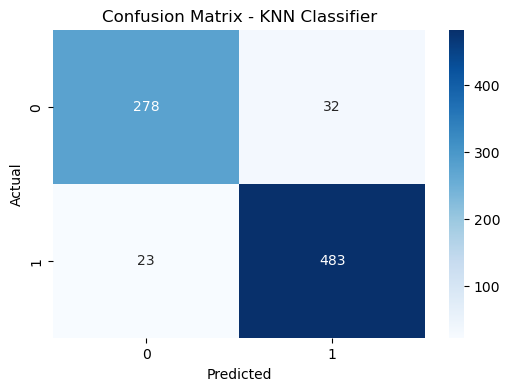

Confusion Matrix - Decision Tree:
[[289  21]
 [ 24 482]]



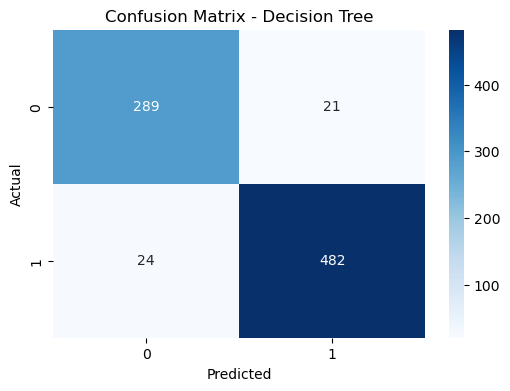

Confusion Matrix - Gaussian Naive Bayes:
[[306   4]
 [ 25 481]]



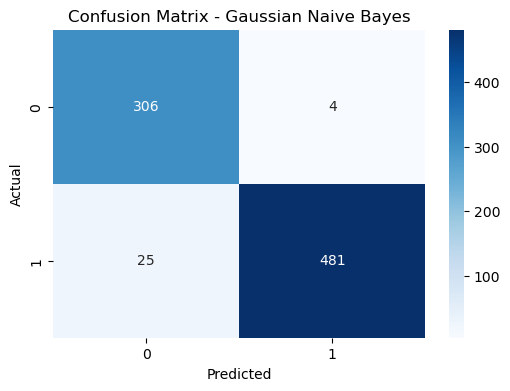

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = [knn, dt, gnb]
model_names = ['KNN Classifier', 'Decision Tree', 'Gaussian Naive Bayes']

for i, model in enumerate(models):
    # Fit the model to the training data
    model.fit(x_train_scaled, y_train_pred)

    # Make predictions on the test data
    y_pred = model.predict(x_test_scaled)

    # Evaluate the performance of the model
    cm = confusion_matrix(y_test_pred, y_pred)
    print(f"Confusion Matrix - {model_names[i]}:\n{cm}\n")

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {model_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [47]:
#Create a list for models
models = ['KNN Classifier','Decision Tree Classifier','Gaussian Naive Bayes']

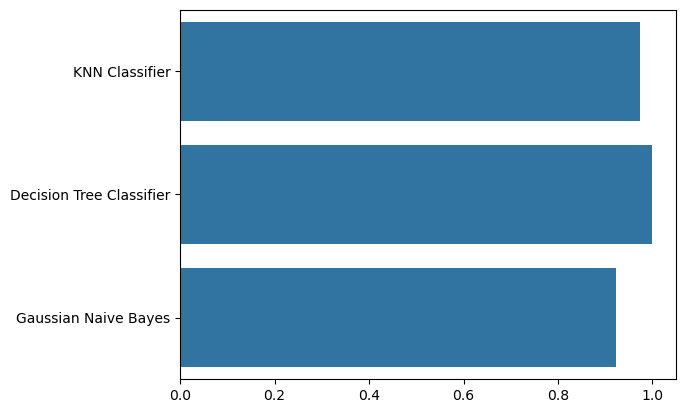

In [48]:
#visualizing the train model accuracy

sns.barplot(y=models,x=train_acc)
plt.show()

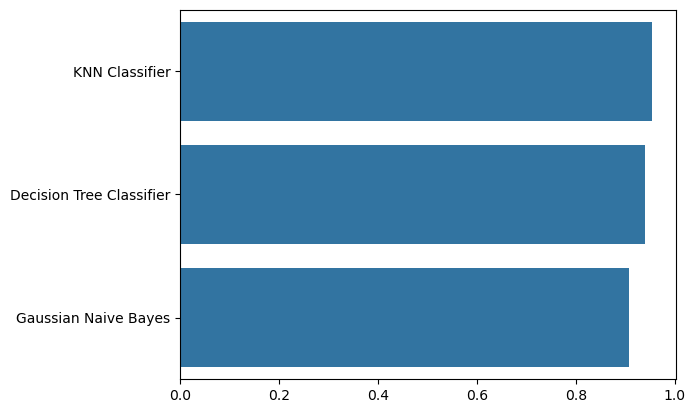

In [49]:
# visualizing the test model accuracy

sns.barplot(y=models,x=test_acc)
plt.show()

In [50]:
#Display summary of the performance
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()


model_dict = {'Model':model_list,'Train Score':train_acc,'Test Score':test_acc}
model_dict

{'Model': [KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB()],
 'Train Score': [0.9745632853202574, 1.0, 0.9227704566349985],
 'Test Score': [0.9546568627450981, 0.9399509803921569, 0.9080882352941176]}

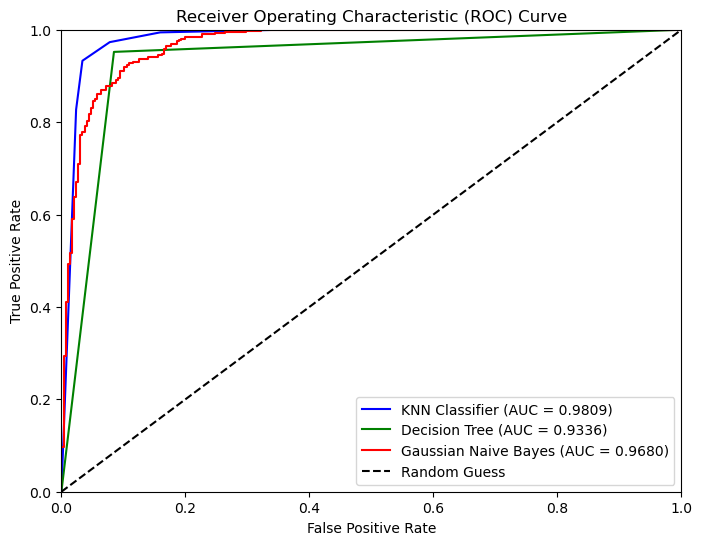

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

model_list = [knn, dt, gnb]
model_names = ['KNN Classifier', 'Decision Tree', 'Gaussian Naive Bayes']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(x_train, y_train)
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.4f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the training and testing data separately
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [54]:
# Apply SMOTE to the training set
smote =  SMOTE(random_state=42)
x_train_resampled,y_train_resampled= smote.fit_resample(x_train_scaler, y_train)

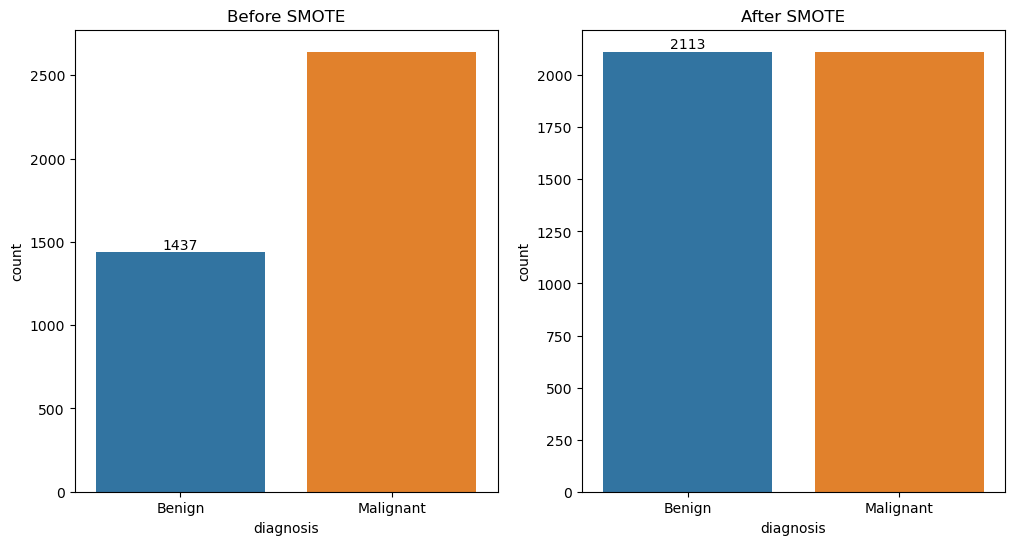

In [55]:
# Plot distribution of target variable before and after SMOTE
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.countplot(data=tumor_cancerous, x='diagnosis', ax=axs[0], palette=['#1f77b4', '#ff7f0e'])
if axs[0].containers:
	axs[0].bar_label(axs[0].containers[0])
axs[0].set_title('Before SMOTE')
axs[0].set_xticklabels(['Benign', 'Malignant'])

sns.countplot(data=pd.DataFrame(y_train_resampled, columns=['diagnosis']), x='diagnosis', ax=axs[1], palette=['#1f77b4', '#ff7f0e'])
if axs[1].containers:
	axs[1].bar_label(axs[1].containers[0])
axs[1].set_title('After SMOTE')
axs[1].set_xticklabels(['Benign', 'Malignant'])

plt.show()


In [56]:
# checking the shape of the train and test datasets

print("The shape of x_train_resampled is: ",x_train_resampled.shape)
print("The shape of x_test_scaler is: ",x_test_scaler.shape)
print("The shape of y_train_resampled is: ",y_train_resampled.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train_resampled is:  (4226, 30)
The shape of x_test_scaler is:  (816, 30)
The shape of y_train_resampled is:  (4226,)
The shape of y_test is:  (816,)


In [57]:
#Cretae list of models
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
models = [
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),
    KNeighborsClassifier()
]

# Perform k-fold cross-validation with k=5 for each model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    cv_results = cross_val_score(model, x_train_resampled, y_train_resampled, cv=kf)
    print(f"Accuracy for {model.__class__.__name__}: {cv_results}")
    print(f"Average accuracy for {model.__class__.__name__}: {cv_results.mean()}\n")

Accuracy for DecisionTreeClassifier: [0.93498818 0.94556213 0.93491124 0.93136095 0.93136095]
Average accuracy for DecisionTreeClassifier: 0.9356366891882442

Accuracy for GaussianNB: [0.91607565 0.93017751 0.90769231 0.92426036 0.91005917]
Average accuracy for GaussianNB: 0.9176529998461259

Accuracy for KNeighborsClassifier: [0.94444444 0.97159763 0.95739645 0.94911243 0.95857988]
Average accuracy for KNeighborsClassifier: 0.9562261669953976



In [58]:
# Define the hyperparameter search space for each model
dt_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Instantiate each model
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
gnb = GaussianNB()

In [59]:
# Create a dictionary of models
models = {
    'DecisionTreeClassifier': dt,
    'GaussianNB': gnb,
    'KNeighborsClassifier': knn
}

# Iterate over the models
for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(x_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name}: Accuracy = {accuracy}')

DecisionTreeClassifier: Accuracy = 0.9313725490196079
GaussianNB: Accuracy = 0.9252450980392157
KNeighborsClassifier: Accuracy = 0.9852941176470589


In [60]:
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(x_train_resampled, y_train_resampled)

# Train the final model on the entire resampled training set with the best hyperparameters for each model
best_knn = KNeighborsClassifier(**knn_grid_search.best_params_)
best_knn.fit(x_train_resampled, y_train_resampled)

# Get the training accuracy score
train_knn_accuracy = best_knn.score(x_train_resampled, y_train_resampled)

# Evaluate the final model on the test set
knn_y_pred = best_knn.predict(x_test_scaler)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_confusion = confusion_matrix(y_test, knn_y_pred)

# Print the evaluation results
print("KNN Classifier")
print("Training Accuracy:", train_knn_accuracy)
print("Test Accuracy:", knn_accuracy)


KNN Classifier
Training Accuracy: 1.0
Test Accuracy: 0.9546568627450981


In [ ]:
# pairplot for worst columns
#Next We show the corellation between the Worst Columns and the Diagnosis Column
#The Pairplot will show the relationship between the Worst Columns and the Diagnosis Column
sns.pairplot(df[theworst_col],hue = 'diagnosis', palette='Oranges')
plt.show()

In [ ]:
#Pair Plot of the Dataset According to the Diagnosis
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])
plt.show()

In [ ]:
#Correlation Matrix of the first 31 Columns
#df.corr()
df.iloc[:, 0:33].corr()

In [ ]:
df.corr()['diagnosis'].sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True, fmt='.1f', cbar=True,mask=np.triu(np.ones_like(df.corr(),dtype=bool)))
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [ ]:
corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.1)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")
print(df.shape)
print(df.columns)

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[themean_col].corr(), cmap='coolwarm', annot=True, fmt='.1f', cbar=True, mask=np.triu(np.ones_like(df[themean_col].corr(), dtype=bool))) #fmt='.1f' to show the correlation values
#To change color of the heatmap cmap='YlGnBu',
plt.show()      #This shows the Correlation between the Features    #The Correlation is between 0 and 1
#The Correlation is Strong when it is Close to 1

In [ ]:
corr_matrix = df[themean_col].corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.50)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")
print("Columns Dropped are ", to_drop)

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[thestandarddev_col].corr(), cmap='coolwarm', annot=True, fmt='.1f', cbar=True, mask=np.triu(np.ones_like(df[thestandarddev_col].corr(), dtype=bool))) #fmt='.1f' to show the correlation values
#To change color of the heatmap cmap='YlGnBu',
plt.show()      #This shows the Correlation between the Features    #The Correlation is between 0 and 1
#The Correlation is Strong when it is Close to 1

In [ ]:
corr_matrix1 = df[thestandarddev_col].corr().abs() 

mask1 = np.triu(np.ones_like(corr_matrix1, dtype = bool))
tri_df = corr_matrix1.mask(mask1)

to_drop1 = [z for z in tri_df.columns if any(tri_df[z] > 0.20)]

df = df.drop(to_drop1, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")
print("Columns Dropped are ", to_drop1)

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.iloc[:, 2:26].corr(), cmap='coolwarm',annot=True, fmt='.1f', cbar=True,mask=np.triu(np.ones_like(df.corr(),dtype=bool)))
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
corr_matrix1 = df.iloc[:, 1:26].corr().abs()

mask1 = np.triu(np.ones_like(corr_matrix1, dtype = bool))
tri_df = corr_matrix1.mask(mask1)

to_drop1 = [z for z in tri_df.columns if any(tri_df[z] > 0.60)]
df = df.drop(to_drop1, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")
print("Columns Dropped are ", to_drop1)

In [ ]:
df.drop('perimeter_worst', axis=1, inplace=True)
df.drop('area_worst', axis=1, inplace=True)


In [ ]:
df.shape

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets
# The Training Set is 80% of the Dataset while the Test Set is 20% of the Dataset
# The Random State is set to 42

X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=22)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)
print("Count of Training set according to M & B:", y_train.value_counts())
print("Count of Test set according to M & B:", y_test.value_counts())



In [ ]:
# Plotting the distribution of the train and test sets

plt.figure(figsize=(12, 6))

# Train set distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette=['#1f77b4', '#ff7f0e'])
plt.title('Train Set Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Test set distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_test, palette=['#1f77b4', '#ff7f0e'])
plt.title('Test Set Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
#I think I need to Undersample the Dataset to balance the Dataset
#I will use the RandomUnderSampler to balance the Dataset
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
X_train_rus = pd.DataFrame(X_train_rus, columns=X_train.columns)
y_train_rus = pd.Series(y_train_rus)    #This will balance the Dataset
print("Count of Training set according to M & B after RandomUnderSampler:", y_train_rus.value_counts()) #This will show the count of the Balanced Dataset
